In [1]:
import pandas as pd
import numpy as np
import pylab as plt
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


   Из данной таблицы можно сделать вывод, что самому пожилому пассажиру на "Титанике" было 80 лет, а самому маленькому около пяти месяцев. Средний возраст пассажиров составлял 30 лет. Преимущественно на корабле находились молодые люди(с детьми) в возрасте до 40 лет.

<AxesSubplot:xlabel='Age', ylabel='Count'>

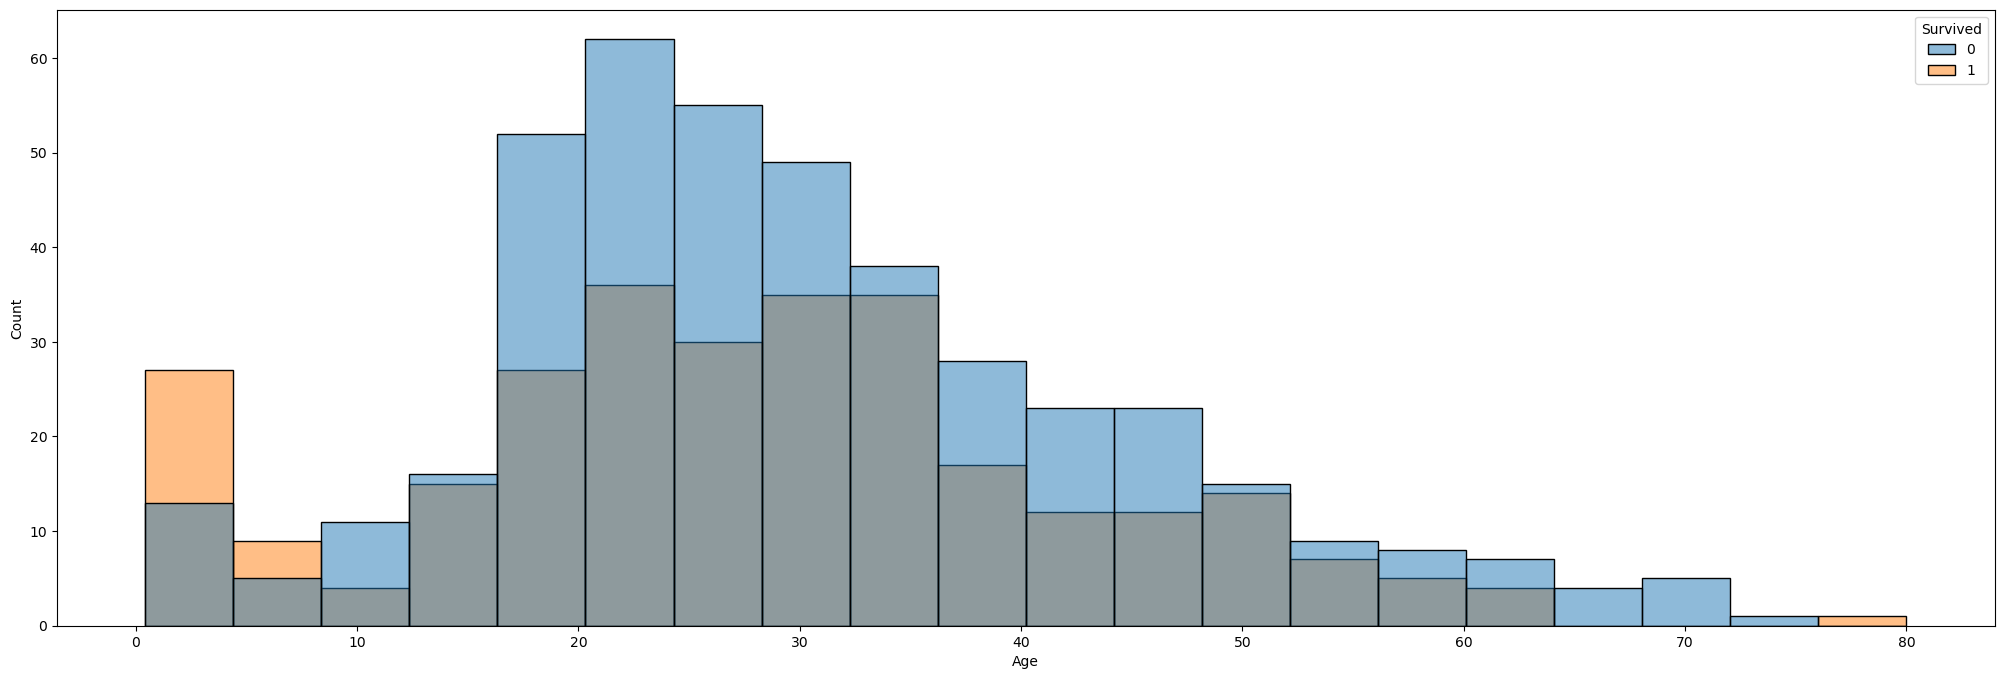

In [5]:
plt.figure(figsize=(25, 8))
sns.histplot(x=df.Age, hue=df.Survived)

   Самый высокий процент выживаемости наблюдался среди маленьких детей(до 7-8 лет) и пожилых людей, самый низкий - в группе пассажиров от 64 до 76 лет. Женщины с детьми и старики - категории, которые в приоритете у экипажа для оказания помощи в случае бедствия.

In [6]:
ages = df['Age'].dropna().mean()

In [7]:
ages

29.69911764705882

In [8]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
sex_counts = df.Sex.value_counts()

In [11]:
sex_counts

male      577
female    314
Name: Sex, dtype: int64

In [12]:
pclass_percent = df.Pclass.value_counts(normalize=True).mul(100).round(2)\
                   .reset_index().rename(columns={'index':'Pclass', 'Pclass':'Percentage'})

In [13]:
pclass_percent

,Pclass,Percentage
0,3,55.11
1,1,24.24
2,2,20.65


In [14]:
surv_percent = df.Survived.value_counts(normalize=True).mul(100).round(2).reset_index()

In [15]:
surv_percent

,index,Survived
0,0,61.62
1,1,38.38


In [16]:
surv = df['Survived'].value_counts()

In [17]:
surv

0    549
1    342
Name: Survived, dtype: int64

In [18]:
surv_pclass = df.groupby(['Pclass'], as_index=False).agg({'Survived':'sum'})

In [19]:
surv_pclass

,Pclass,Survived
0,1,136
1,2,87
2,3,119


   Из 891(577 мужчин и 314 женщин) пассажира выжило лишь 342(38.4 %). Несмотря на то, что 55% от всех пассажиров составляли путешественники 3-го класса, самое большое число выживших среди состоятельных пассажиров, которые путешествовали первым классом.

In [20]:
df.groupby(['Pclass','Sex'], as_index=False).agg({'Survived':'sum'}).sort_values('Survived', ascending=False)

,Pclass,Sex,Survived
0,1,female,91
4,3,female,72
2,2,female,70
5,3,male,47
1,1,male,45
3,2,male,17


<AxesSubplot:xlabel='Survived', ylabel='count'>

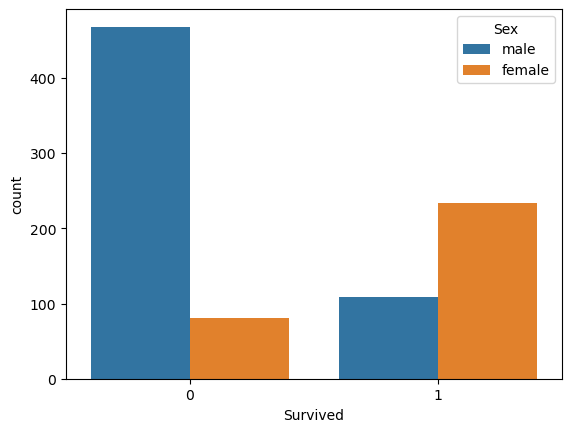

In [21]:
sns.countplot(x=df.Survived, hue=df.Sex)

   Среди пассажиров женского пола выживших примерно в два раза больше, чем среди мужчин, т.к. в первую очередь спасали женщин и детей.

In [22]:
df.groupby(['Pclass','Embarked'], as_index=False).agg({'Survived':'sum'}).sort_values('Pclass')

,Pclass,Embarked,Survived
0,1,C,59
1,1,Q,1
2,1,S,74
3,2,C,9
4,2,Q,2
5,2,S,76
6,3,C,25
7,3,Q,27
8,3,S,67


In [23]:
df.Embarked.value_counts(normalize=True).mul(100).round(2).reset_index()\
           .rename(columns={'index':'Embarked', 'Embarked':'Percentage'})

,Embarked,Percentage
0,S,72.44
1,C,18.90
2,Q,8.66


In [24]:
df.value_counts('Embarked')

Embarked
S    644
C    168
Q     77
dtype: int64

<AxesSubplot:xlabel='Embarked', ylabel='count'>

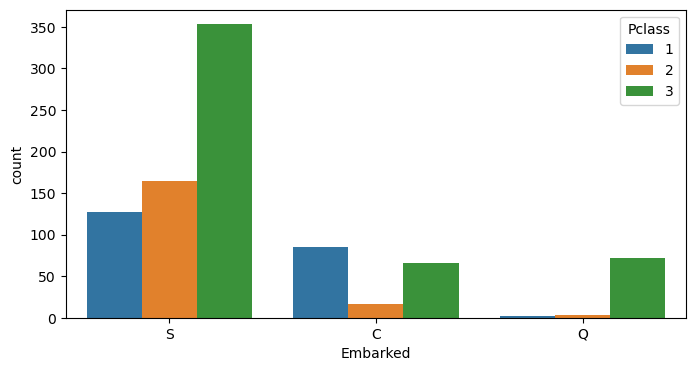

In [25]:
plt.figure(figsize=(8,4))
sns.countplot(x=df.Embarked, hue=df.Pclass)

<AxesSubplot:xlabel='Embarked', ylabel='count'>

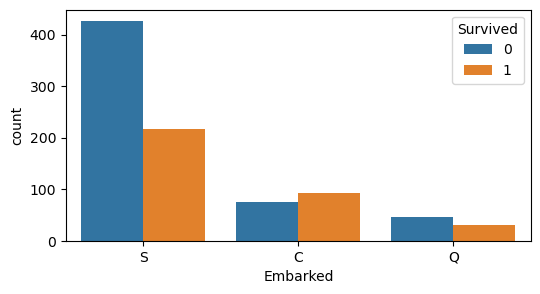

In [26]:
plt.figure(figsize=(6,3))
sns.countplot(x=df.Embarked, hue=df.Survived)

   Больше всего пассажиров(72.44%), более половины из которых купили билеты в 3-й класс, зашло на борт в Саутгемптоне(стартовый порт), примерно треть из них выжила, остальные - погибли. Почти все пассажиры, совершившие посадку в Квинстауне(2-я остановка), купили билеты в 3-й класс - чуть более трети из них остались в живых. Пассажиры с посадкой в Шербуре(1-я остановка) оказались самыми удачливыми - более 50% из них выжили. При этом около половины пассажиров, принятых на борт в Шербуре, путешествовали 1-м классом, а значит первыми оказались в спасательных шлюпках.  

In [27]:
data = [df] 

for dataset in data:
    dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

In [28]:
title = dataset['Title'].value_counts()

In [29]:
title

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: Title, dtype: int64

In [30]:
titles = df.groupby([dataset['Title']], as_index = False).agg({'Survived':'sum'}).sort_values('Survived')

In [31]:
titles

,Title,Survived
0,Capt,0
3,Don,0
15,Rev,0
5,Jonkheer,0
14,Ms,1
11,Mme,1
7,Major,1
16,Sir,1
2,Countess,1
1,Col,1


  Незамужние женщины имели самый высокий шанс на спасение. Командир "Титаника" погиб вместе со своим кораблём. На борту находились 6 служителей церкви - все они погибли. На борту было две титулованные особы(Сэр и Графиня) - их спасли.

<AxesSubplot:xlabel='Survived', ylabel='Title'>

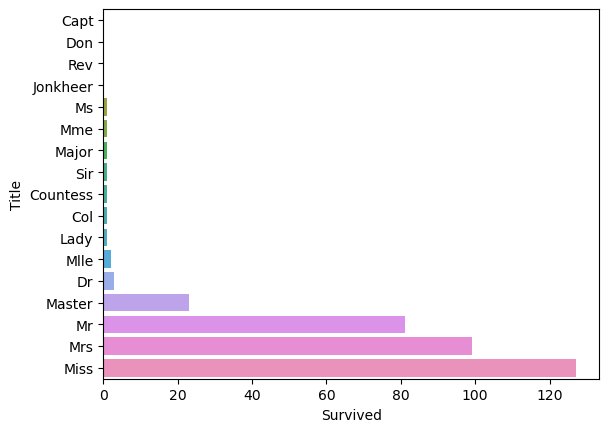

In [32]:
draw_titles = sns.barplot(data=titles, x='Survived', y='Title')
draw_titles

   Таким образом, анализ датасета показал, что на борту "Титаника" находился 891 человек, из которых выжило только 342, или 38.38% от общего количества. Средний возраст пассажиров составлял около тридцати лет. 55% от общего количества людей на борту составляли пассажиры 3-го класса, 21% - пассажиры 2-го класса и 24% - пассажиры первого класса. Мужчин было гораздо больше, чем женщин (577 и 314 соответственно), но большинство выживших женского пола, так как женщинам и детям в первую очередь предоставлялись спасательные шлюпки. Больше всего выживших оказалось среди пассажиров 1 - го класса, чьё спасение было приоритетным для экипажа. Меньше всего выживших - среди пассажиров 3-го класса. Выживаемость напрямую зависила от статуса и пола пассажира и не зависила от пункта посадки(так, в порту Шербура, среди пассажиров которого наибольший процент выживаемости, совершило посадку много состоятельных людей, путешествоваших 1-м классом). Возраст пассажиров не оказал особого влияния на шанс выжить - исключение составили дети младшего возраста, из которых 2/3 выжили.